In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8]

In [8]:
ids = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']
model_folder='model_20012017'

For n_clusters = 2 The average silhouette_score is : 0.6364139346524682
For n_clusters = 3 The average silhouette_score is : 0.48275217854076236
For n_clusters = 4 The average silhouette_score is : 0.3596834275490726
For n_clusters = 5 The average silhouette_score is : 0.38336757525021853
For n_clusters = 6 The average silhouette_score is : 0.35685131066497944
For n_clusters = 7 The average silhouette_score is : 0.2710595505795817
For n_clusters = 8 The average silhouette_score is : 0.1328146090424242


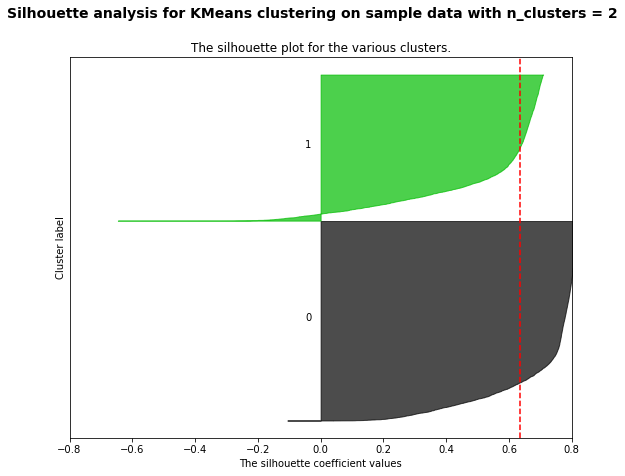

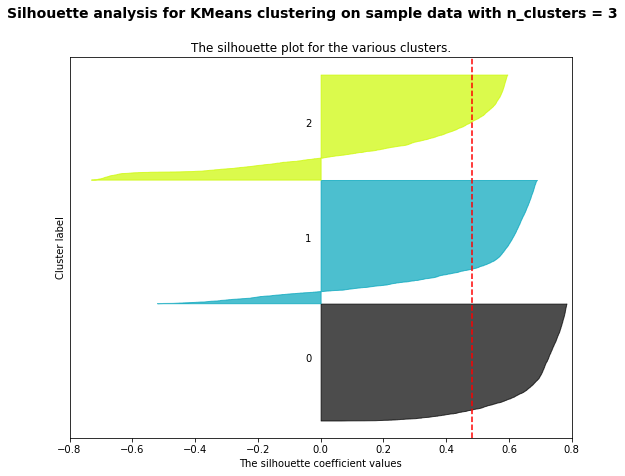

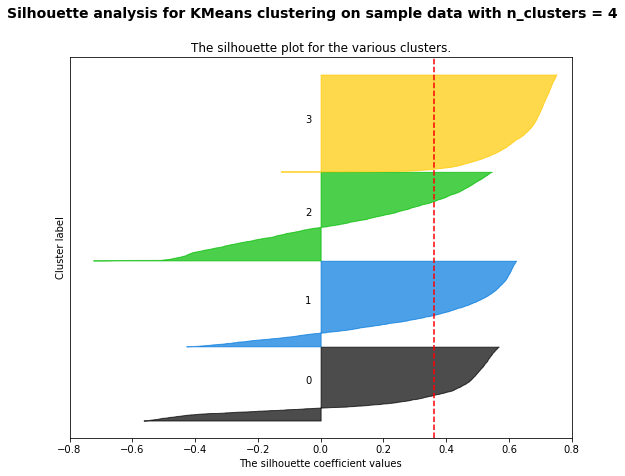

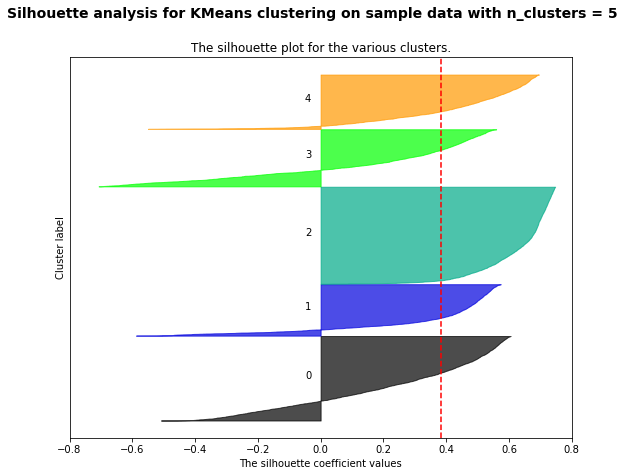

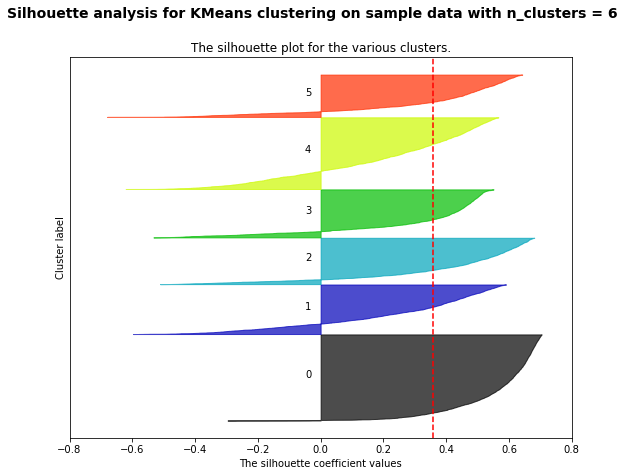

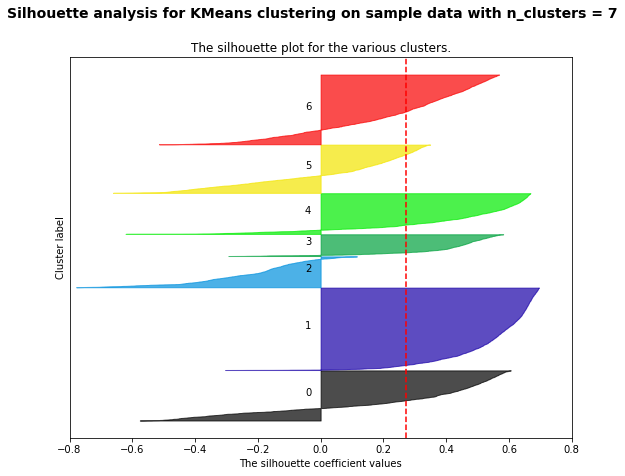

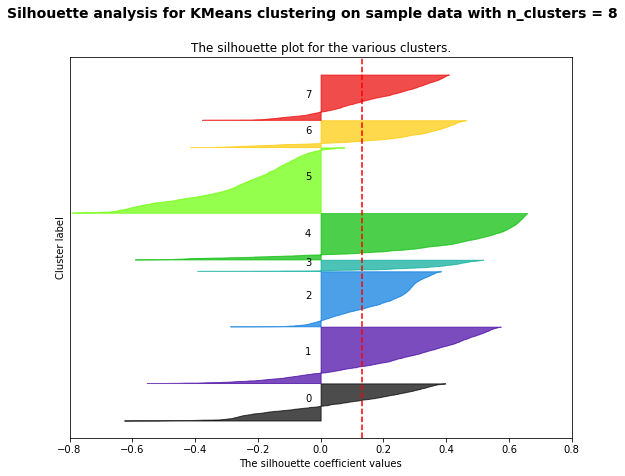

In [17]:
m_id=ids[1]
for n_clusters in range_n_clusters:
    path_n = '{}/{}/{}'.format(model_folder, m_id, n_clusters)
    
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.8, 0.8])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
  #  ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    with open('{}/sil.obj'.format(path_n), 'rb') as file:
            silhouette_avg   = pickle.load(file)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Load silhouette scores for each sample
    with open('{}/sil_vals.obj'.format(path_n), 'rb') as file:
            sample_silhouette_values   = pickle.load(file)
    with open('{}/sil_labels.obj'.format(path_n), 'rb') as file:
            cluster_labels  = pickle.load(file)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
  #  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()